# central limit theorem(중심극한정리)

In [58]:
import numpy as np
np.random.seed(42)

# gamma분포로부터 무작위 표본 추출
pop_data = np.random.gamma(1,100,3000)

# 모평균
pop_data.mean()

100.35978700795846

In [59]:
pop_data

array([ 46.926809  , 301.01214309, 131.67456935, ...,  37.07562782,
        34.25544405, 205.11576037])

In [60]:
import matplotlib.pylab as plt
means_size_3 = []

In [61]:
means_size_3

[]

In [62]:
np.random.choice(pop_data, 3).mean()

34.86585877838206

In [63]:
means_size_3.append(np.random.choice(pop_data, 3).mean())

In [64]:
for i in range(10000):
    means_size_3.append(np.random.choice(pop_data, 3).mean())

In [66]:
means_size_3[:5]

[61.31860863778709,
 219.5489583258817,
 157.40606042572435,
 191.33279184393902,
 249.6346893294606]

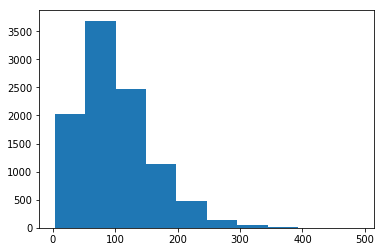

In [67]:
plt.hist(means_size_3);

In [68]:
means_size_100 = []

In [69]:
means_size_100

[]

In [70]:
for i in range(10000):
    means_size_100.append(np.random.choice(pop_data, 100).mean())

In [71]:
means_size_100[:5]

[96.18258414919448,
 89.52440745235462,
 95.77098029726774,
 89.15702004879854,
 99.06535457550235]

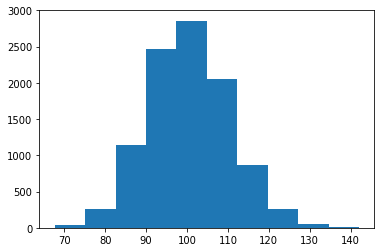

In [73]:
plt.hist(means_size_100);

In [74]:
pop_data.mean()

100.35978700795846

In [75]:
np.mean(means_size_100)

100.42877293191447

In [76]:
pop_data.var()

9955.76939306549

In [77]:
np.var(means_size_100)

99.37705839214219

# Skewness(왜도)

In [1]:
from scipy.stats import skew

In [17]:
data = [1,3,5,7,9]

In [18]:
skew(data)

0.0

# pywinauto: 메뉴 목록을 검색한다.

In [16]:
from pywinauto.application import Application
import time

In [17]:
app = Application(backend="uia").start("notepad")
time.sleep(5)

In [ ]:
# https://github.com/pywinauto/pywinauto/issues/385

In [18]:
app.top_window().descendants(control_type="MenuBar")
app_menu = app.top_window().descendants(control_type="MenuBar")[1]
app_menu.items()

[<uia_controls.MenuItemWrapper - '파일(F)', MenuItem, 800555904327611914>,
 <uia_controls.MenuItemWrapper - '편집(E)', MenuItem, 800555904323126419>,
 <uia_controls.MenuItemWrapper - '서식(O)', MenuItem, 800555904324621584>,
 <uia_controls.MenuItemWrapper - '보기(V)', MenuItem, 800555904332097409>,
 <uia_controls.MenuItemWrapper - '도움말(H)', MenuItem, 800555904333592574>]

# startfile

In [83]:
import os
os.startfile("thumbnail.png")

# 웹사이트 이미지 자동저장
나무위키는 안 된다. 403 Forbidden 뜬다.

In [19]:
from urllib.request import urlretrieve
from bs4 import BeautifulSoup
import urllib.request
import re

In [20]:
def reference_open(reference):
    url = []
    f = open(reference, "r", encoding="UTF8")
    while True:
        line = f.readline()
        if not line: break
            
        if "http" not in line:
            pass
        else:
            url.append(line[:-1])
    f.close()
    return url

In [21]:
def get_src(url_list):
    r = re.compile("http")
    list = []
    for url in url_list:
        html = urllib.request.urlopen(url)
        source = html.read()
        soup = BeautifulSoup(source, "html.parser")
        body_tag = soup.find("body")
        img = body_tag.find_all("img")
        for src in img:
            if r.match(src.get("src")):
                list.append(src.get("src"))
            else:
                list.append(url.split("/")[0] + "//" + url.split("/")[2] + src.get("src"))
    return list

In [22]:
def img_save(src):
    r = re.compile("http")
    for s in src:
        if r.match(s) == None:
            pass
        else:
            try:
                urllib.request.urlretrieve(s, "thumbnail/" + s.replace("\\","").replace("/","").replace(":", "").replace("*", "").replace("?", "").replace('""', "").replace("<", "").replace(">", "").replace("|", "") + ".jpg")
            except:
                pass

In [28]:
url = reference_open("reference.txt")
url

['http://hlbkorea.com']

In [29]:
src = get_src(url)
src[:5]

['http://hlbkorea.com/include/images/main/hand.png']

In [31]:
img_save(src)

# pptx

In [44]:
from pptx import Presentation 
from pptx.util import Inches
from pptx.enum.shapes import MSO_SHAPE

In [45]:
prs = Presentation()

In [46]:
slide_layout = prs.slide_layouts[1] 

In [47]:
slide = prs.slides.add_slide(slide_layout)

In [48]:
shapes = slide.shapes

In [49]:
shapes.title.text = "hello"

In [50]:
shapes.add_picture("thumbnail.png", Inches(13), Inches(7.5))

In [51]:
shapes = slide.shapes
left = top = width = height = Inches(1.0)
shape = shapes.add_shape(MSO_SHAPE.ROUNDED_RECTANGLE, left, top, width, height)

In [52]:
prs.save("pythonPPT.pptx")

# 정규표현식
https://greeksharifa.github.io/%EC%A0%95%EA%B7%9C%ED%91%9C%ED%98%84%EC%8B%9D(re)/2018/07/20/regex-usage-01-basic/

In [54]:
import re
matchObj = re.match("a", "a")
print(matchObj)

<re.Match object; span=(0, 1), match='a'>


In [55]:
print(re.match("a", "aba"))
print(re.search("a", "aba"))

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='a'>


In [56]:
print(re.match("a", "bbb"))
print(re.search("a", "bbb"))

None
None


In [57]:
print(re.match("a", "baa"))
print(re.search("a", "baa"))

None
<re.Match object; span=(1, 2), match='a'>
